# Skillbox — Мастер-класс: Разведочный анализ данных + Подготовка отчётов — Kiva.org
***

# Новый раздел

# 4. Домашнее задание
***

In [1]:
import numpy as np
import pandas as pd
import math

from datetime import datetime, timedelta

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
df_kiva_loans = pd.read_csv("kiva_loans.csv")
df_mpi = pd.read_csv("kiva_mpi_region_locations.csv")
df_kiva_loans.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [3]:
df_kiva_loans['borrower_genders'].value_counts()

female                                                                                                                                                                                                                                426502
male                                                                                                                                                                                                                                  134710
female, female                                                                                                                                                                                                                         12164
female, female, female                                                                                                                                                                                                                 11676
female, female, female, female                      

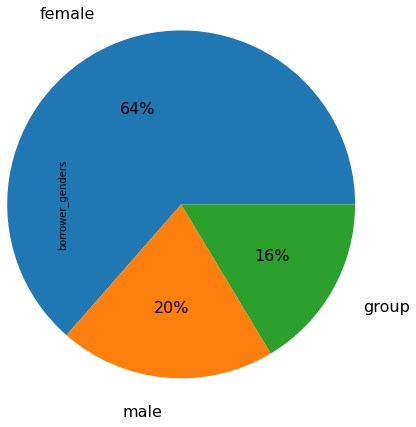

In [4]:
df_kiva_loans['borrower_genders'] = [elem if elem in ['female','male'] else 'group' for elem in df_kiva_loans['borrower_genders'] ]

borrowers = df_kiva_loans['borrower_genders'].value_counts()

plot = borrowers.plot.pie(fontsize=16, autopct='%1.0f%%', labeldistance=1.2, radius=2)

In [5]:
countries = df_kiva_loans['country'].value_counts()[df_kiva_loans['country'].value_counts(normalize=True)> 0.005]
list_countries = list(countries.index)

In [6]:
countries

Philippines      160441
Kenya             75825
El Salvador       39875
Cambodia          34836
Pakistan          26857
Peru              22233
Colombia          21995
Uganda            20601
Tajikistan        19580
Ecuador           13521
Paraguay          11903
Nicaragua         11781
India             11237
Vietnam           10843
Nigeria           10136
Bolivia            8806
Lebanon            8792
Armenia            8631
Palestine          8167
Samoa              7396
Guatemala          7310
Rwanda             6735
Mali               6639
Honduras           6557
Indonesia          6214
United States      6093
Kyrgyzstan         5774
Togo               5749
Mexico             5741
Sierra Leone       5415
Tanzania           5219
Ghana              4374
Jordan             4167
Zimbabwe           4034
Madagascar         3821
Liberia            3682
Haiti              3618
Mozambique         3483
Name: country, dtype: int64

In [7]:
df_gender_by_country = \
    df_kiva_loans[df_kiva_loans['country'].isin(countries.index.values)]\
    .groupby(['country', 'borrower_genders'])['borrower_genders']\
    .count()\
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())\
    .unstack('borrower_genders')\
    .fillna(0)\
    .sort_values(by=['male', 'female'])[-20:]

df_gender_by_country = df_gender_by_country[['male', 'group', 'female']]

## 4.1. Самостоятельная работа
***

- А в каких странах преобладают мужчины? Группа людей? (п. 2.2.2.)
- Изучите несколько займов с очень большими суммами. Что можно сказать о назначении этих заявок? В каких странах они оформлены? Каков гендерный состав заявителей? (п. 2.4.2.)
- Попробуйте найти связь между странами (регионами), полом заёмщика и суммой заявки. Какие выводы можно сделать из этих данных? (п. 2.4.3.)

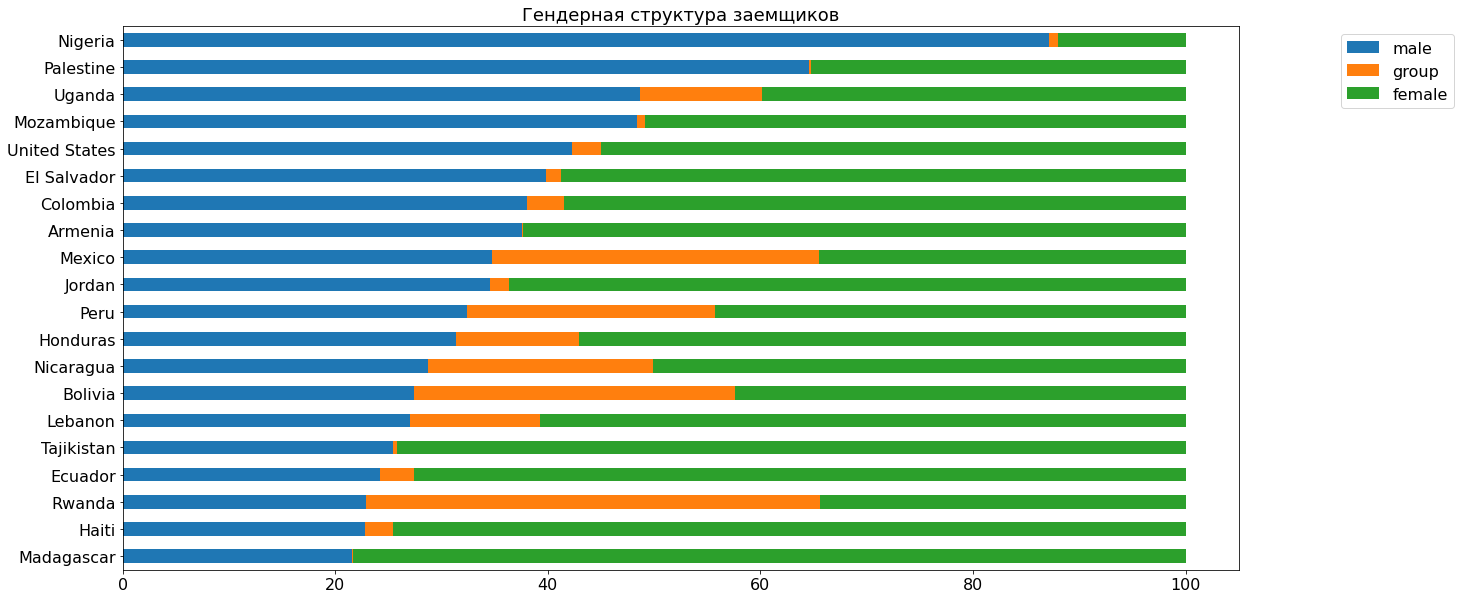

In [8]:
plot = df_gender_by_country.plot.barh(
        figsize=(20,10)
        , fontsize=16
        , stacked=True
        , title='Гендерная структура заемщиков')
plot.title.set_size(18)
plot.legend(loc=1, bbox_to_anchor=(1.2, 1), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()

In [ ]:
#Ответ: Мужчины преобладают в странах: Нигерия, Палестина, Уганда, Мозамбик.

In [9]:
df_gender_by_country = \
    df_kiva_loans[df_kiva_loans['country'].isin(countries.index.values)]\
    .groupby(['country', 'borrower_genders'])['borrower_genders']\
    .count()\
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())\
    .unstack('borrower_genders')\
    .fillna(0)\
    .sort_values(by=['group'])[-20:]

df_gender_by_country = df_gender_by_country[['group', 'male', 'female']]

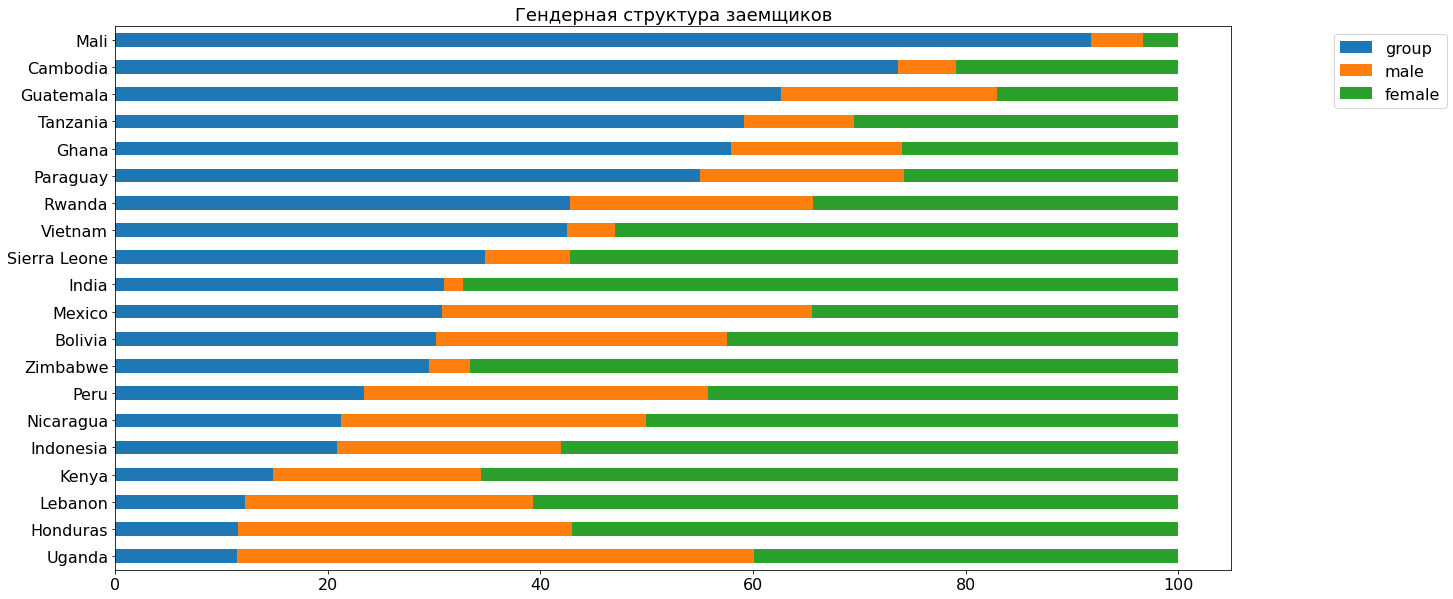

In [10]:
plot = df_gender_by_country.plot.barh(
        figsize=(20,10)
        , fontsize=16
        , stacked=True
        , title='Гендерная структура заемщиков')
plot.title.set_size(18)
plot.legend(loc=1, bbox_to_anchor=(1.2, 1), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()

In [ ]:
#Ответ: Группы людей преобладают в странах: Мали, Камбоджа,Гватемала, Танзания

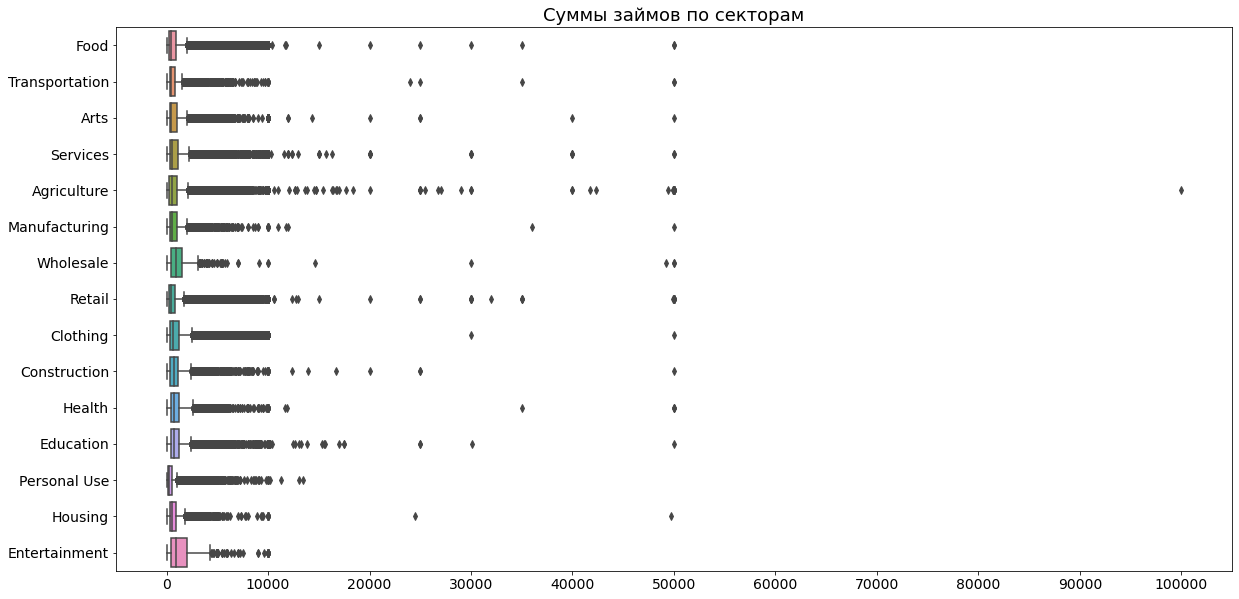

In [11]:
fig, ax = plt.subplots(figsize=(20,10))
plt.title("Суммы займов по секторам", fontsize=18)
plt.xticks(np.arange(0, max(df_kiva_loans['loan_amount']+1), 10000))
plt.tick_params(labelsize=14)

sns.boxplot(x='loan_amount', y="sector", data=df_kiva_loans).set(ylabel=None, xlabel=None)
plt.show()

In [ ]:
#Изучите несколько займов с очень большими суммами (например, суммы больше 40000 USD). Что можно сказать о назначении этих заявок? В каких странах они оформлены? Каков гендерный состав заявителей

In [12]:
large = df_kiva_loans[df_kiva_loans.loan_amount > 40000]
large.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
34196,687045,50000.0,50000.0,Renewable Energy Products,Retail,to buy and sell Barefoot Power's Solar Lightin...,PE,Peru,Arequipa,USD,212.0,2014-03-21 05:25:02+00:00,2014-05-21 07:00:00+00:00,2014-04-18 06:32:55+00:00,14.0,1446,"user_favorite, user_favorite, #Eco-friendly, #...",male,irregular,2014-03-21
43182,695450,50000.0,50000.0,Renewable Energy Products,Retail,To buy and sell Barefoot Power's solar lightin...,KE,Kenya,Nairobi,USD,212.0,2014-04-09 08:25:02+00:00,2014-06-09 07:00:00+00:00,2014-04-19 19:27:30+00:00,16.0,1491,"user_favorite, user_favorite, user_favorite, u...",male,bullet,2014-04-09
53634,706146,50000.0,50000.0,Renewable Energy Products,Retail,To buy and sell Barefoot Power solar lighting.,UG,Uganda,Kampala,USD,212.0,2014-05-06 09:25:03+00:00,2014-07-06 07:00:00+00:00,2014-05-18 15:31:08+00:00,14.0,1581,"#Eco-friendly, #Biz Durable Asset, #Post-disbu...",female,bullet,2014-05-06
70499,722883,100000.0,100000.0,Agriculture,Agriculture,create more than 300 jobs for women and farmer...,HT,Haiti,Les Cayes,USD,315.0,2014-06-10 19:25:02+00:00,2014-09-08 07:00:00+00:00,2014-06-19 20:21:04+00:00,75.0,2986,"user_favorite, user_favorite, user_favorite, u...",female,irregular,2014-06-10
126839,777718,50000.0,50000.0,Agriculture,Agriculture,to buy and plant resin producing pine trees. T...,MX,Mexico,Cherán,USD,376.0,2014-10-01 20:46:15+00:00,2014-08-31 07:00:00+00:00,2014-12-07 17:02:10+00:00,144.0,586,"user_favorite, user_favorite, #Biz Durable Ass...",group,irregular,2014-10-01


In [13]:
Activity = large['activity'].value_counts()
Activity

Agriculture                  18
Renewable Energy Products    10
Health                        3
Goods Distribution            3
Taxi                          2
Fruits & Vegetables           1
Water Distribution            1
Higher education costs        1
Construction                  1
Clothing                      1
Property                      1
Poultry                       1
Electronics Sales             1
Furniture Making              1
Food Production/Sales         1
Farming                       1
Arts                          1
Services                      1
Name: activity, dtype: int64

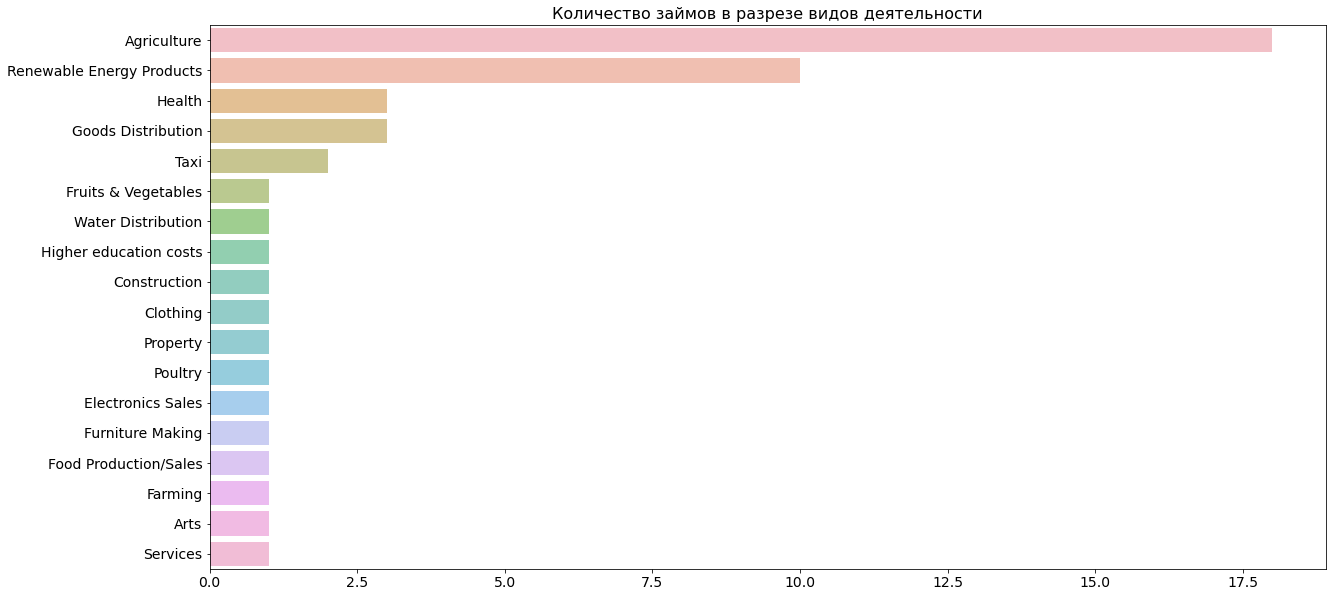

In [18]:
plt.figure(figsize=(20,10))
plt.title("Количество займов в разрезе видов деятельности", fontsize=16)
plt.tick_params(labelsize=14)

sns.barplot(y=Activity.index, x=Activity.values, alpha=0.6)
plt.show();

In [ ]:
#Ответ: Заявки с суммами превышающие 40000 USD нацелены на сельское хозяйство и возобновляемую энергетику 

In [19]:
Country = large['country'].value_counts()
Country

Kenya            7
Mexico           6
Peru             5
Haiti            4
Ghana            4
Rwanda           3
Uganda           3
Tanzania         2
Ecuador          1
Chile            1
Mozambique       1
Benin            1
Guatemala        1
Mali             1
Pakistan         1
South Sudan      1
Zambia           1
Cote D'Ivoire    1
Indonesia        1
Madagascar       1
Malawi           1
Albania          1
Zimbabwe         1
Name: country, dtype: int64

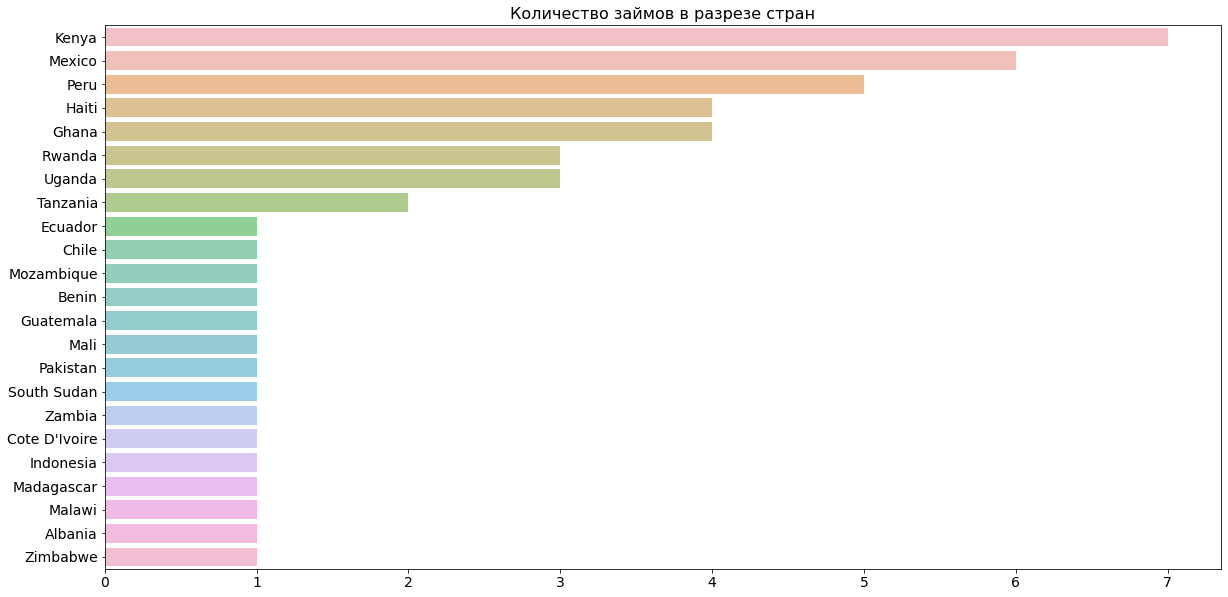

In [20]:
plt.figure(figsize=(20,10))
plt.title("Количество займов в разрезе стран", fontsize=16)
plt.tick_params(labelsize=14)

sns.barplot(y=Country.index, x=Country.values, alpha=0.6)
plt.show();

In [ ]:
#Ответ: Кения, Мексика, Перу, Гаити, Гана

In [21]:
df_gender_outliers = large.groupby(['borrower_genders'])['borrower_genders'].count().sort_values(ascending=False)
df_gender_outliers.head()

borrower_genders
male      27
female    15
group      7
Name: borrower_genders, dtype: int64

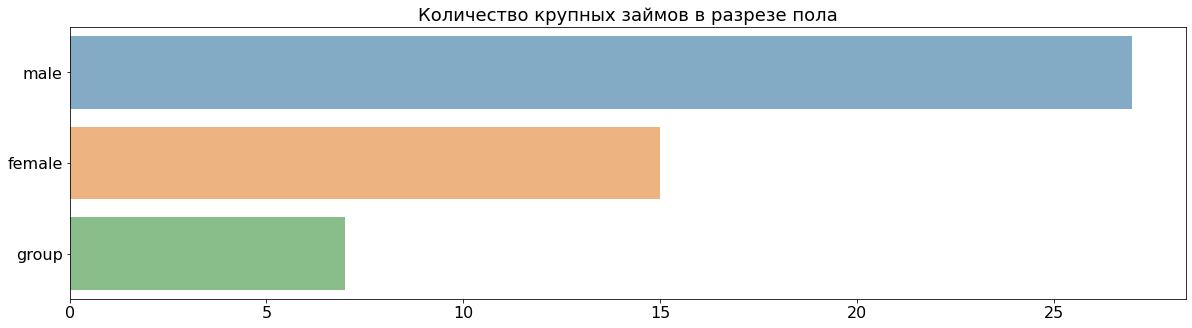

In [22]:
plt.figure(figsize=(20,5))
plot = sns.barplot(y=df_gender_outliers.index, x=df_gender_outliers.values, alpha=0.6)
plot.set(ylabel=None, xlabel=None)
plt.title("Количество крупных займов в разрезе пола", fontsize=18)
plt.tick_params(labelsize=16)

In [ ]:
#Ответ: Мужчины в отличие от женщин и групповых заявок берут больше займов, превышающих сумму 40000 USD.

## 4.2. Домашняя работа
***

Расширьте наш отчёт исследованием следующих вопросов:

- Зависимость пола заёмщика от региона планеты, сектора экономики.
- Влияние такого атрибута займа, как **Количество кредиторов** (lender_count), на суммы и сроки займов.
- Влияние показателя **MPI** (многомерный индекс бедности) в разных странах на суммы займов и сроки погашения.
- Зависимости таких метрик, как «Сумма займа», «Срок займа», «Время финансирования заявки», «Ежемесячный платёж», в разрезе **макрорегионов**.

In [34]:
sectors = df_kiva_loans['sector'].value_counts()[df_kiva_loans['sector'].value_counts(normalize=True)> 0.005]
list_sectors = list(sectors.index)

In [35]:
sectors

Agriculture       180302
Food              136657
Retail            124494
Services           45140
Personal Use       36385
Housing            33731
Clothing           32742
Education          31013
Transportation     15518
Arts               12060
Health              9223
Construction        6268
Manufacturing       6208
Name: sector, dtype: int64

In [36]:
df_gender_by_sector = \
    df_kiva_loans[df_kiva_loans['sector'].isin(sectors.index.values)]\
    .groupby(['sector', 'borrower_genders'])['borrower_genders']\
    .count()\
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())\
    .unstack('borrower_genders')\
    .fillna(0)\
    .sort_values(by=['male', 'female'])[-20:]

df_gender_by_sector = df_gender_by_sector[['male', 'group', 'female']]

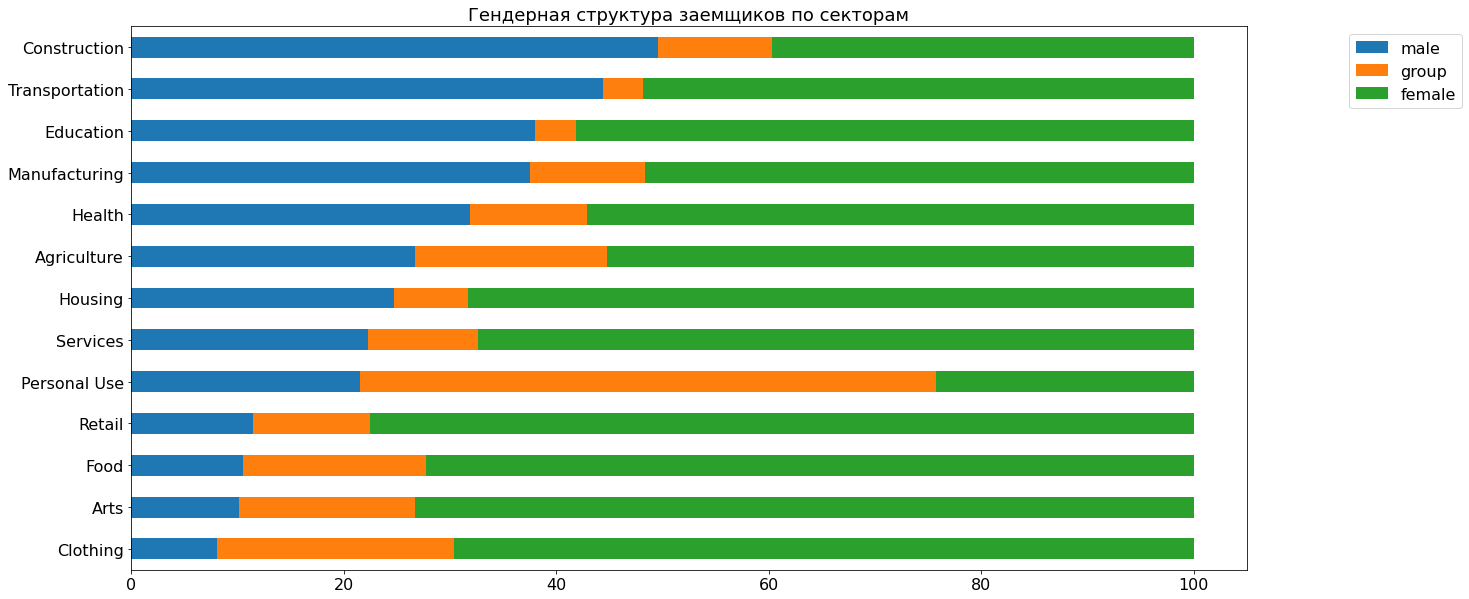

In [37]:
plot = df_gender_by_sector.plot.barh(
        figsize=(20,10)
        , fontsize=16
        , stacked=True
        , title='Гендерная структура заемщиков по секторам')
plot.title.set_size(18)
plot.legend(loc=1, bbox_to_anchor=(1.2, 1), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()

In [ ]:
#Ответ: Мужчины чаще берут кредиты на строительство, групповые заявки делают для персональных нужд.

In [ ]:
#Влияние Количество кредиторов (lender_count), на суммы и сроки займов.

In [38]:
df_kiva_loans.lender_count.describe()

count    671205.000000
mean         20.590922
std          28.459551
min           0.000000
25%           7.000000
50%          13.000000
75%          24.000000
max        2986.000000
Name: lender_count, dtype: float64

In [39]:
bins = [-1, 6, 13, 20, 27, 34, 41]
df_kiva_loans['binned'] = pd.cut(df_kiva_loans['lender_count'], bins=bins)
df_kiva_loans.head(50)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,binned
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,...,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01,"(6.0, 13.0]"
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,...,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,group,irregular,2014-01-01,"(13.0, 20.0]"
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,...,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01,"(-1.0, 6.0]"
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,...,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01,"(6.0, 13.0]"
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,...,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01,"(13.0, 20.0]"
5,1080148,250.0,250.0,Services,Services,purchase leather for my business using ksh 20000.,KE,Kenya,NaN,KES,...,2014-01-01 10:06:19+00:00,2014-01-30 01:42:48+00:00,2014-01-29 14:14:57+00:00,4.0,6,NaN,female,irregular,2014-01-01,"(-1.0, 6.0]"
6,653067,200.0,200.0,Dairy,Agriculture,To purchase a dairy cow and start a milk produ...,IN,India,Maynaguri,INR,...,2014-01-01 09:51:02+00:00,2013-12-16 08:00:00+00:00,2014-01-01 17:18:09+00:00,43.0,8,"user_favorite, user_favorite",female,bullet,2014-01-01,"(6.0, 13.0]"
7,653078,400.0,400.0,Beauty Salon,Services,to buy more hair and skin care products.,PK,Pakistan,Ellahabad,PKR,...,2014-01-01 11:46:01+00:00,2013-12-20 08:00:00+00:00,2014-01-10 18:18:44+00:00,14.0,8,"#Elderly, #Woman Owned Biz",female,monthly,2014-01-01,"(6.0, 13.0]"
8,653082,475.0,475.0,Manufacturing,Manufacturing,"to purchase leather, plastic soles and heels i...",PK,Pakistan,Lahore,PKR,...,2014-01-01 11:49:43+00:00,2013-12-20 08:00:00+00:00,2014-01-01 18:47:21+00:00,14.0,19,user_favorite,female,monthly,2014-01-01,"(13.0, 20.0]"
9,653048,625.0,625.0,Food Production/Sales,Food,"to buy a stall, gram flour, ketchup, and coal ...",PK,Pakistan,Lahore,PKR,...,2014-01-01 05:41:03+00:00,2013-12-17 08:00:00+00:00,2014-01-03 15:45:04+00:00,11.0,24,NaN,female,irregular,2014-01-01,"(20.0, 27.0]"


In [40]:
df_kiva_loans['binned'].value_counts().sort_values(ascending = False)

(6, 13]     200036
(-1, 6]     152120
(13, 20]    113337
(20, 27]     62105
(27, 34]     40495
(34, 41]     29901
Name: binned, dtype: int64

In [41]:
df_kiva_loans_binned_median = df_kiva_loans.groupby(['binned']).agg({'loan_amount' : 'median'}).reset_index()
df_kiva_loans_binned_median = df_kiva_loans_binned_median.sort_values(by = 'binned')
df_kiva_loans_binned_median

,binned,loan_amount
0,"(-1, 6]",200.0
1,"(6, 13]",300.0
2,"(13, 20]",500.0
3,"(20, 27]",750.0
4,"(27, 34]",1000.0
5,"(34, 41]",1100.0


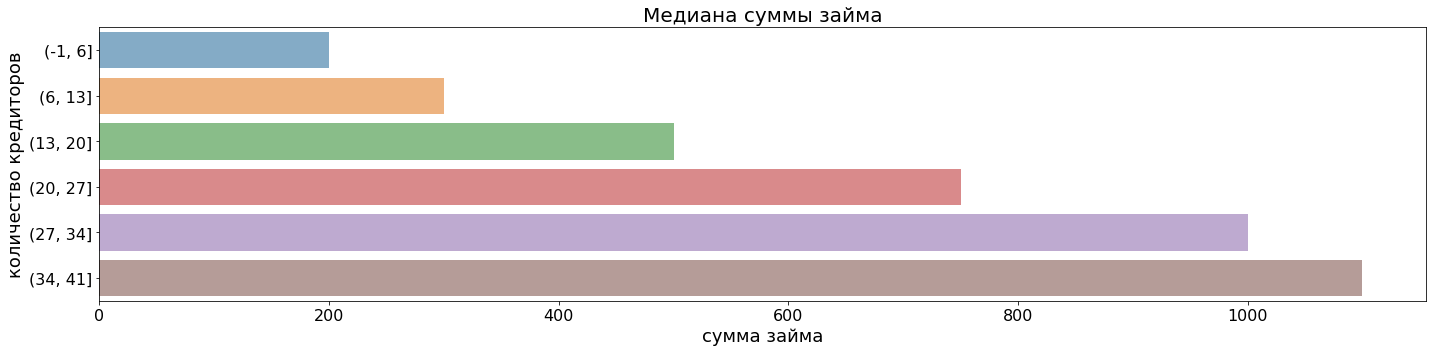

In [42]:
f, ax = plt.subplots(1, sharey = True, figsize = (20, 5))
sns.barplot(y='binned', x='loan_amount', data = df_kiva_loans_binned_median, alpha =0.6)
ax.set_title('Медиана суммы займа', fontsize = 20)
ax.set_xlabel('сумма займа', fontsize = 18)
ax.set_ylabel('количество кредиторов', fontsize = 18, rotation = 90)
ax.tick_params(labelsize = 16)

plt.tight_layout()
plt.show()

In [ ]:
#Сумма займа зависит от количества кредиторов по экспоненте.

In [43]:
df_kiva_loans_binned_median1 = df_kiva_loans.groupby(['binned']).agg({'term_in_months' : 'median'}).reset_index()
df_kiva_loans_binned_median1 = df_kiva_loans_binned_median1.sort_values(by = 'binned')
df_kiva_loans_binned_median1

,binned,term_in_months
0,"(-1, 6]",8.0
1,"(6, 13]",12.0
2,"(13, 20]",14.0
3,"(20, 27]",14.0
4,"(27, 34]",14.0
5,"(34, 41]",14.0


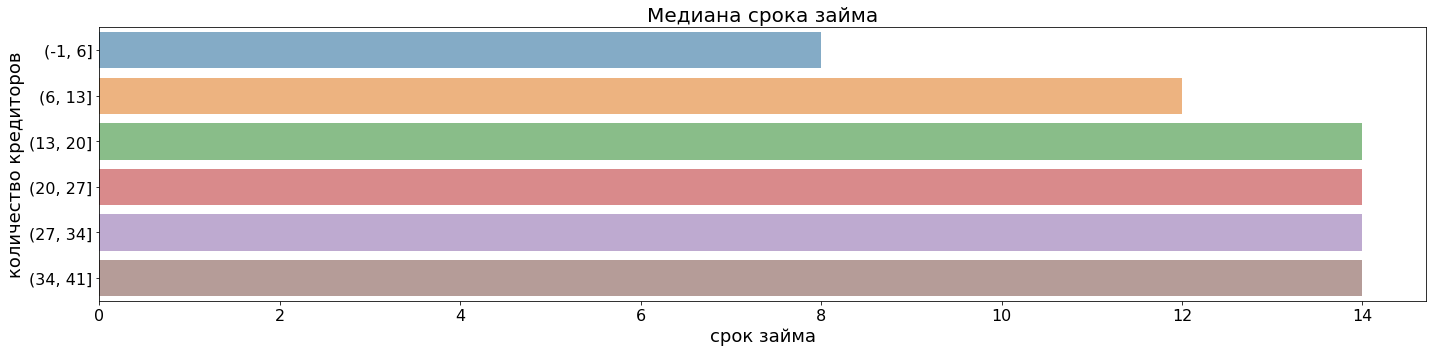

In [44]:
f, ax = plt.subplots(1, sharey = True, figsize = (20, 5))
sns.barplot(y='binned', x='term_in_months', data = df_kiva_loans_binned_median1, alpha =0.6)
ax.set_title('Медиана срока займа', fontsize = 20)
ax.set_xlabel('срок займа', fontsize = 18)
ax.set_ylabel('количество кредиторов', fontsize = 18, rotation = 90)
ax.tick_params(labelsize = 16)

plt.tight_layout()
plt.show()

In [ ]:
#Чем больше кредиторов, тем срок займа не зависит от количества кредиторов.

In [ ]:
#Влияние показателя MPI (многомерный индекс бедности) в разных странах на суммы займов и сроки погашения.

In [45]:
df_mpi.head()

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


In [46]:
df_mpi_grouped = df_mpi\
    .groupby(['ISO', 'country', 'world_region'])['MPI']\
    .mean()\
    .fillna(0)\
    .reset_index()

In [47]:
df_kiva_loans = df_kiva_loans.merge(df_mpi_grouped, how='left', on='country')

In [48]:
regions = df_kiva_loans['world_region'].value_counts()

In [49]:
regions_list = regions.index.to_list()

In [ ]:
#Попробуйте найти связь между странами (регионами), полом заёмщика и суммой заявки. Какие выводы можно сделать из этих данных?

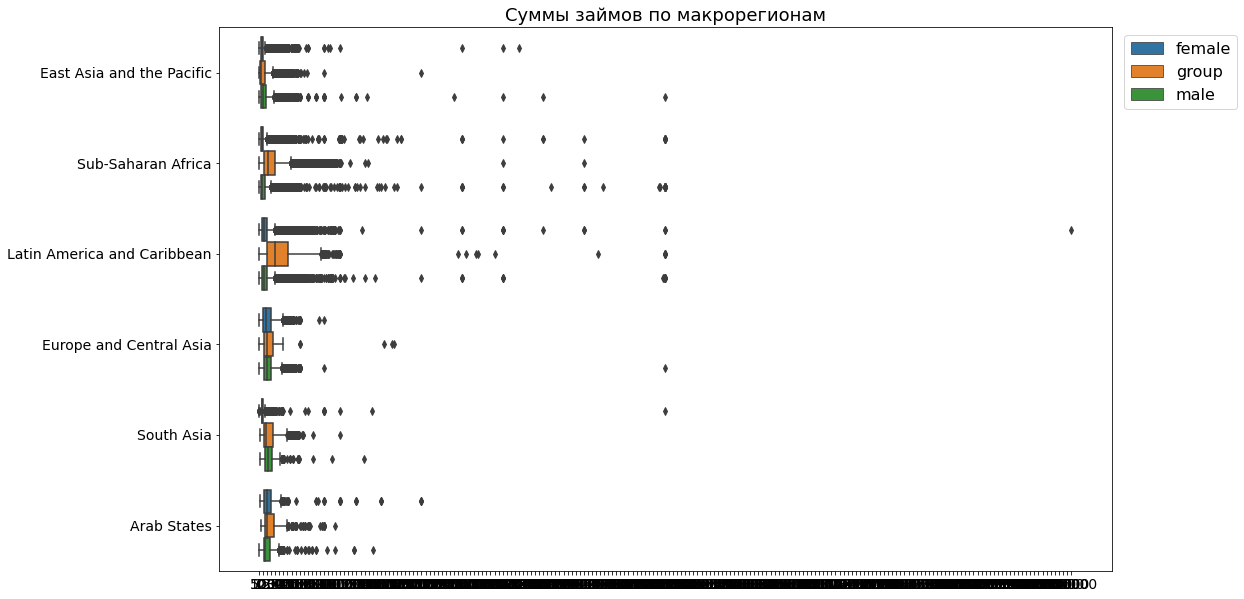

In [50]:
plt.figure(figsize=(16,10))
plt.title("Суммы займов по макрорегионам", fontsize=18)
plt.xticks(np.arange(0, max(df_kiva_loans['loan_amount']+1), 500))
plt.tick_params(labelsize=14)


sns.boxplot(x='loan_amount', y="world_region", hue='borrower_genders', order=regions_list, data=df_kiva_loans)\
    .set(ylabel=None, xlabel=None)
plt.legend(loc=1, bbox_to_anchor=(1.15, 1), fontsize=16)
plt.show()

In [ ]:
#Ответ: 
#Во всех макрорегионах количество групповых заявок на большие суммы преобладает над количеством индивидуальных заявок.
#Почти незначительна разница в регионах Центральная Азия и Европа.
#А в Арабских странах медианная сумма заявок среди женщин больше чем у межчин.

In [72]:
world_regions = df_kiva_loans['world_region'].value_counts()[df_kiva_loans['world_region'].value_counts(normalize=True)> 0.005]
list_world_regions = list(world_regions.index)

In [73]:
world_regions

East Asia and the Pacific      206949
Sub-Saharan Africa             162903
Latin America and Caribbean    133759
Europe and Central Asia         38827
South Asia                      38815
Arab States                      9187
Name: world_region, dtype: int64

In [76]:
df_gender_by_world_region = \
    df_kiva_loans[df_kiva_loans['world_region'].isin(world_regions.index.values)]\
    .groupby(['world_region', 'borrower_genders'])['borrower_genders']\
    .count()\
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())\
    .unstack('borrower_genders')\
    .fillna(0)\
    .sort_values(by=['male'])[-20:]

df_gender_by_world_region = df_gender_by_world_region[['male', 'group', 'female']]

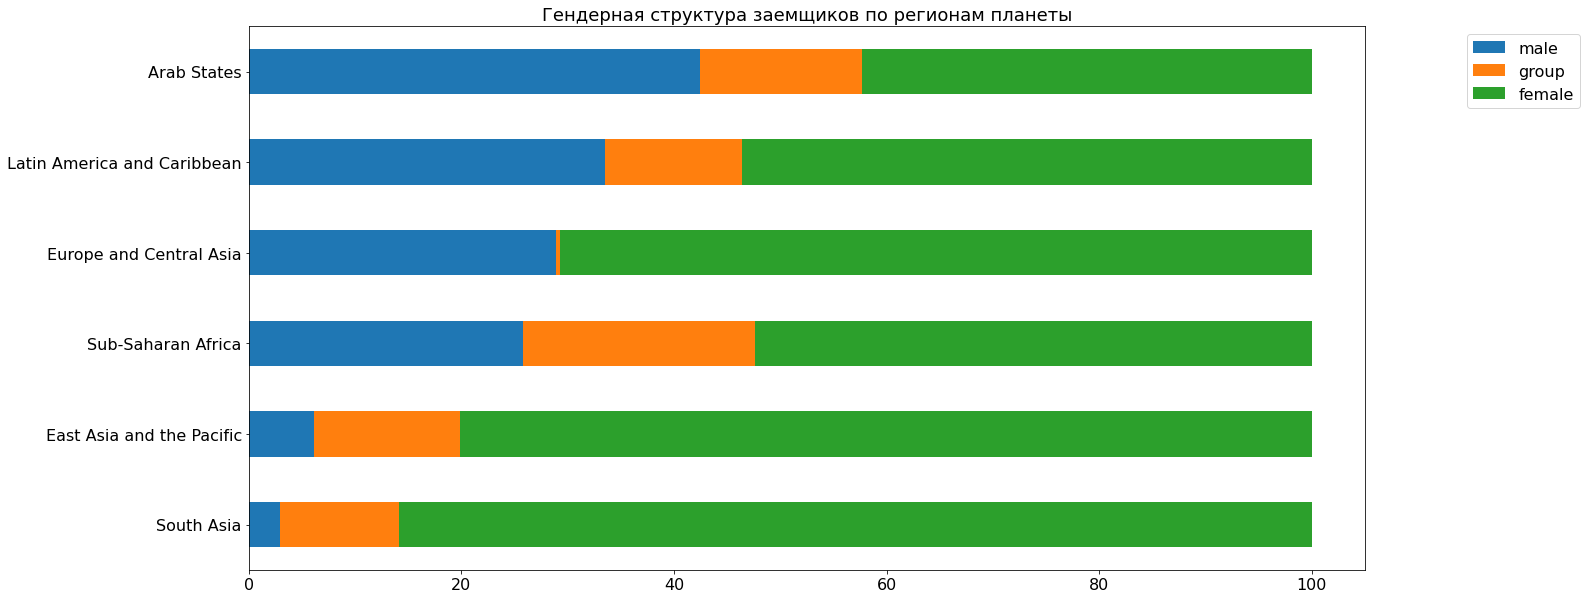

In [77]:
plot = df_gender_by_world_region.plot.barh(
        figsize=(20,10)
        , fontsize=16
        , stacked=True
        , title='Гендерная структура заемщиков по регионам планеты')
plot.title.set_size(18)
plot.legend(loc=1, bbox_to_anchor=(1.2, 1), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()

In [ ]:
#Ответ: Мужчины в качестве заемщиков преобладают в Арабских эмиратах, в остальных регионах планеты в основном преобладают женщины

In [51]:
df_kiva_loans

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,binned,ISO,world_region,MPI
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,...,12.0,12,NaN,female,irregular,2014-01-01,"(6, 13]",PAK,South Asia,0.233167
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,...,11.0,14,NaN,group,irregular,2014-01-01,"(13, 20]",PAK,South Asia,0.233167
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,...,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01,"(-1, 6]",IND,South Asia,0.000000
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,...,11.0,8,NaN,female,irregular,2014-01-01,"(6, 13]",PAK,South Asia,0.233167
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,...,14.0,16,NaN,female,monthly,2014-01-01,"(13, 20]",PAK,South Asia,0.233167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671200,1340323,0.0,25.0,Livestock,Agriculture,"[True, u'para compara: cemento, arenya y ladri...",PY,Paraguay,Concepción,USD,...,13.0,0,NaN,female,monthly,2017-07-25,"(-1, 6]",NaN,NaN,NaN
671201,1340316,25.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,...,13.0,1,NaN,female,monthly,2017-07-25,"(-1, 6]",KEN,Sub-Saharan Africa,0.209375
671202,1340334,0.0,25.0,Games,Entertainment,NaN,KE,Kenya,NaN,KES,...,13.0,0,NaN,group,monthly,2017-07-26,"(-1, 6]",KEN,Sub-Saharan Africa,0.209375
671203,1340338,0.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,...,13.0,0,NaN,female,monthly,2017-07-26,"(-1, 6]",KEN,Sub-Saharan Africa,0.209375


In [52]:
df_kiva_loans.MPI.describe()

count    590440.000000
mean          0.130413
std           0.117497
min           0.000000
25%           0.053080
50%           0.061824
75%           0.209375
max           0.549778
Name: MPI, dtype: float64

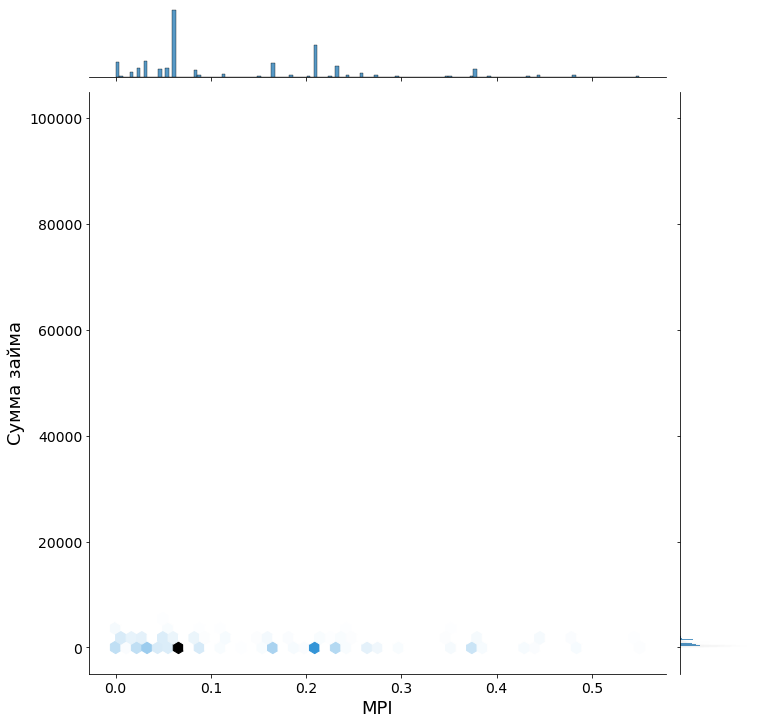

In [53]:
p = sns.jointplot(x = 'MPI', y = 'loan_amount', data = df_kiva_loans, kind = 'hex', height = 10, ratio = 7 )\
.set_axis_labels('MPI', 'Сумма займа', size = 18)
p.ax_joint.tick_params(labelsize = 14)
plt.show()

In [ ]:
#Из графика видно, что MPI чаще всего повторяется там, где берут маленькие суммы кредитов. То есть в странах с низким MPI кредиты выдают чаще всего на маленькие суммы.

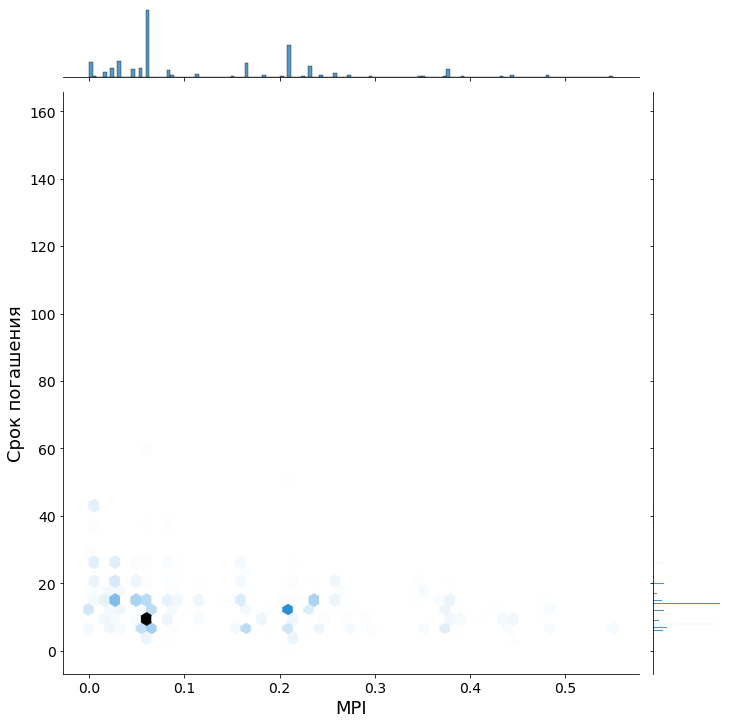

In [54]:
p = sns.jointplot(x = 'MPI', y = 'term_in_months', data = df_kiva_loans, kind = 'hex', height = 10, ratio = 7 )\
.set_axis_labels('MPI', 'Срок погашения', size = 18)
p.ax_joint.tick_params(labelsize = 14)
plt.show()

In [ ]:
#Из графика видно, что MPI чаще всего повторяется там, где маленький срок погашения. То есть в странах с низким MPI кредиты выдают чаще всего на маленький срок.

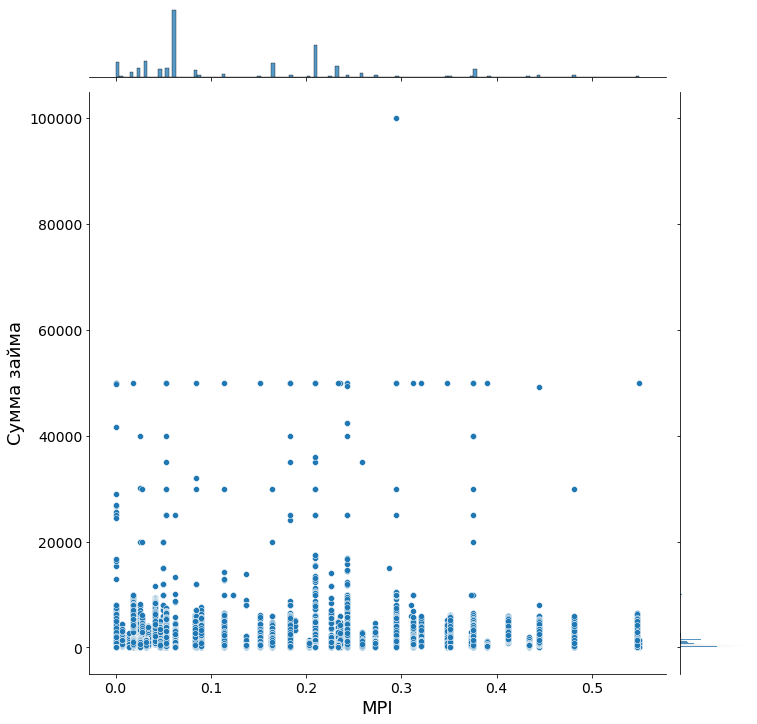

In [55]:
p = sns.jointplot(x = 'MPI', y = 'loan_amount', data = df_kiva_loans, kind = 'scatter', height = 10, ratio = 7 )\
.set_axis_labels('MPI', 'Сумма займа', size = 18)
p.ax_joint.tick_params(labelsize = 14)
plt.show()

In [ ]:
#Из графика видно, что в странах с низким MPI кредиты выдают чаще всего на маленькие суммы.

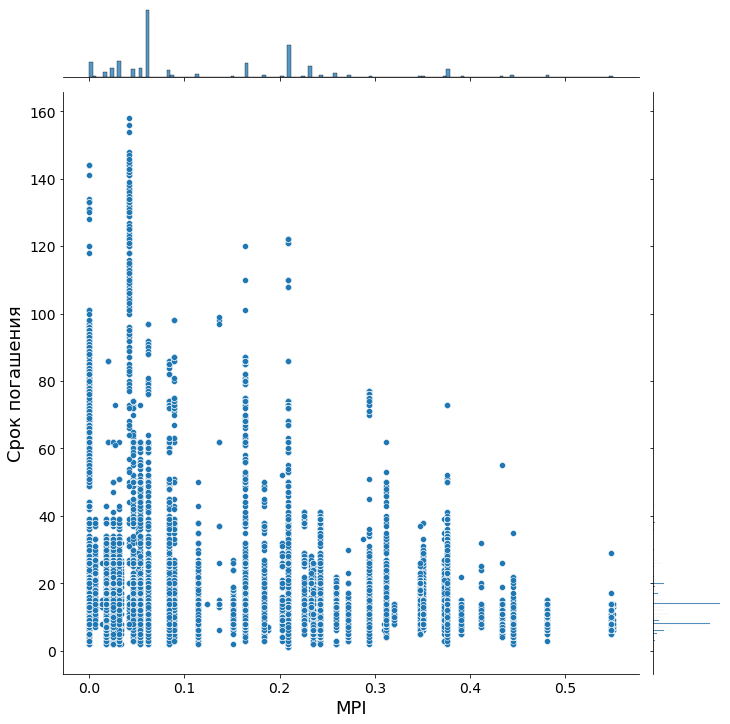

In [62]:
p = sns.jointplot(x = 'MPI', y = 'term_in_months', data = df_kiva_loans, kind = 'scatter', height = 10, ratio = 7 )\
.set_axis_labels('MPI', 'Срок погашения', size = 18)
p.ax_joint.tick_params(labelsize = 14)
plt.show()

In [ ]:
#Из графика видно, что в странах с низким MPI кредиты выдают чаще всего на небольшой срок.

In [ ]:
#Зависимости таких метрик, как «Сумма займа», «Срок займа», «Время финансирования заявки», «Ежемесячный платёж», в разрезе макрорегионов.

In [63]:
# drop na (missing) values
df_loans_dates = df_kiva_loans.dropna(subset=['disbursed_time', 'funded_time'], how='any', inplace=False)

# dates columns:
dates = ['posted_time','disbursed_time']

# format dates:
df_loans_dates[dates] = df_loans_dates[dates].applymap(lambda x : x.split('+')[0])
df_loans_dates[dates] = df_loans_dates[dates].apply(pd.to_datetime)

# calculate time interval
df_loans_dates.loc[:, 'time_funding'] = df_loans_dates['disbursed_time']-df_loans_dates['posted_time']
df_loans_dates.loc[:, 'time_funding'] = df_loans_dates['time_funding'] / timedelta(days=1) 

# remove outliers +-3 sigma
dev = (df_loans_dates['time_funding']-df_loans_dates['time_funding'].mean()).abs()
std = df_loans_dates['time_funding'].std()
# Keep rows where time_funding interval > 0 only
df_loans_dates_trimmed = df_loans_dates[~(dev>3*std) & (df_loans_dates.loc[:, 'time_funding']>0)]
df_loans_dates_trimmed.head()

C:\Users\Eugenia\anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\Eugenia\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Eugenia\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,tags,borrower_genders,repayment_interval,date,binned,ISO,world_region,MPI,monthly_repayment,time_funding
5,1080148,250.0,250.0,Services,Services,purchase leather for my business using ksh 20000.,KE,Kenya,NaN,KES,...,NaN,female,irregular,2014-01-01,"(-1.0, 6.0]",KEN,Sub-Saharan Africa,0.209375,62.500000,28.650336
62,653290,4275.0,4275.0,Personal Housing Expenses,Housing,to pay for the construction of a hygienic toil...,VN,Vietnam,Hai Duong,VND,...,"user_favorite, #Low-profit FP, #Post-disbursed...",group,bullet,2014-01-02,NaN,NaN,NaN,NaN,305.357143,24.866169
67,1080150,125.0,125.0,Energy,Services,purchase solar lanterns for resale.,KE,Kenya,NaN,KES,...,NaN,male,irregular,2014-01-02,"(-1.0, 6.0]",KEN,Sub-Saharan Africa,0.209375,41.666667,27.703970
114,1080151,125.0,125.0,Energy,Services,buy solar lanterns for sale.,KE,Kenya,NaN,KES,...,NaN,female,irregular,2014-01-02,"(6.0, 13.0]",KEN,Sub-Saharan Africa,0.209375,41.666667,27.624109
142,653284,4750.0,4750.0,Personal Housing Expenses,Housing,to pay for the construction of a hygienic toil...,VN,Vietnam,Hai Duong,VND,...,"#Low-profit FP, #Post-disbursed, user_favorite...",group,bullet,2014-01-02,NaN,NaN,NaN,NaN,339.285714,24.875405


In [65]:
df_country_median = df_loans_dates_trimmed.groupby(['world_region', 'country'])\
    .agg({'loan_amount' : 'median', 'time_funding' : 'median', 'term_in_months' : 'median'})\
    .reset_index()

df_country_median = df_country_median[df_country_median.country.isin(list_countries)].sort_values(by='time_funding')

In [66]:
df_country_median = df_country_median.sort_values(by='term_in_months')

In [67]:
df_country_median['monthly_repayment'] = df_country_median['loan_amount'] / df_country_median['term_in_months']

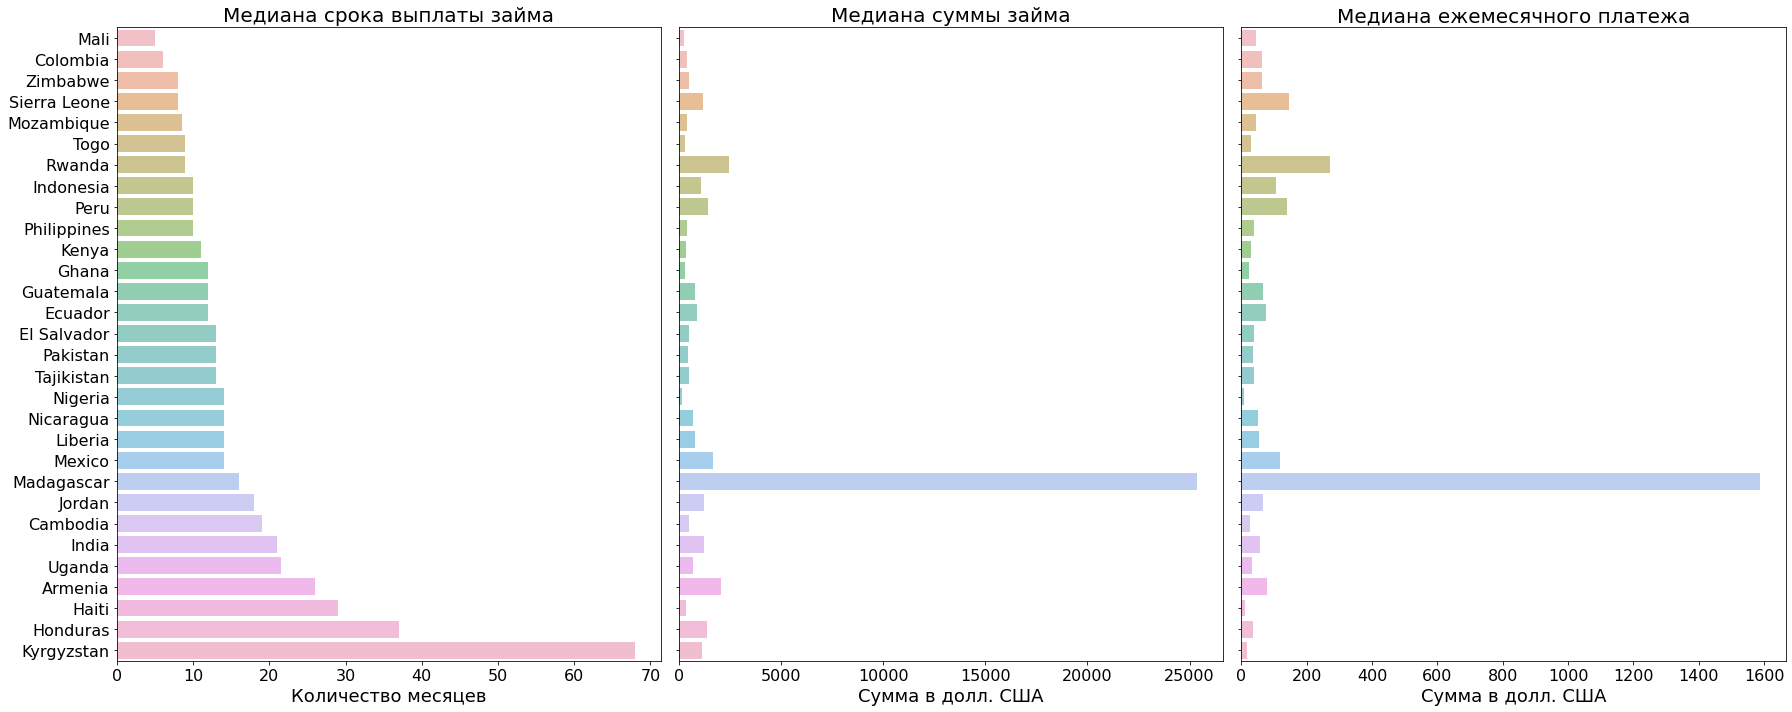

In [68]:
f,ax=plt.subplots(1, 3, sharey=True, figsize=(25,10))

sns.barplot(y='country', x='term_in_months', data=df_country_median, alpha=0.6, ax=ax[0])
ax[0].set_title("Медиана срока выплаты займа", fontsize=20)
ax[0].set_xlabel('Количество месяцев', fontsize=18)
ax[0].set_ylabel(None)
ax[0].tick_params(labelsize=16)

sns.barplot(y='country', x='loan_amount', data=df_country_median, alpha=0.6, ax=ax[1])
ax[1].set_title("Медиана суммы займа", fontsize=20)
ax[1].set_xlabel('Сумма в долл. США', fontsize=18)
ax[1].set_ylabel(None)
ax[1].tick_params(labelsize=16)

sns.barplot(y='country', x='monthly_repayment', data=df_country_median, alpha=0.6, ax=ax[2])
ax[2].set_title("Медиана ежемесячного платежа", fontsize=20)
ax[2].set_xlabel('Сумма в долл. США', fontsize=18)
ax[2].set_ylabel(None)
ax[2].tick_params(labelsize=16)

plt.tight_layout()
plt.show()

In [ ]:
#Ответ: Наибольший срок выплаты займа при маленькой сумме займа и минимальной сумме ежемесячного платежа в Киргизии свидетельствует о крайней бедности населения.
#Наибольшая сумма займа и наибольший ежемесячный платеж на Мадагаскаре, это означает, что там не боятся делать крупные займы. 